<a href="https://colab.research.google.com/github/soujanya-vattikolla/ML-Basics-Definitions/blob/main/KMeansClusteringAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K Means Clustering Algorithm

It is a unsupervised machine learning technique used to cluster data points. 



In [2]:
# import required libraries

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

Exercise:

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [3]:
# loading iris dataset
from sklearn.datasets import load_iris

In [9]:
iris_dataset = load_iris()

In [10]:
dir(iris_dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [15]:
# creating a dataframe

iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
iris_df['target'] = iris_dataset.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
# dropping sepal width, sepal length, target

iris_df.drop(['sepal length (cm)','sepal width (cm)','target'],axis='columns', inplace=True)

In [21]:
iris_df.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [23]:
kmean = KMeans(n_clusters=3)
y_predicted = kmean.fit_predict(iris_df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [24]:
# adding a new column cluster

iris_df['cluster'] = y_predicted
iris_df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [26]:
# finding the unique clusters

iris_df.cluster.unique()

array([0, 2, 1], dtype=int32)

In [27]:
# finding the centroids of clusters

kmean.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

These are the centres for each flower.

In [28]:
# creating a dataframe for each cluster

cluster1_df = iris_df[iris_df.cluster == 0]
cluster2_df = iris_df[iris_df.cluster == 1]
cluster3_df = iris_df[iris_df.cluster == 2]

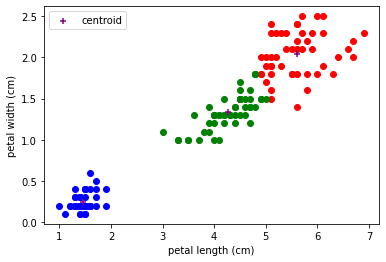

In [32]:
# plotting a scatter plot

plt.scatter(cluster1_df['petal length (cm)'], cluster1_df['petal width (cm)'],color='blue')
plt.scatter(cluster2_df['petal length (cm)'], cluster2_df['petal width (cm)'],color='red')
plt.scatter(cluster3_df['petal length (cm)'], cluster3_df['petal width (cm)'],color='green')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

We can observe that each cluster is clearly seperated from one other.

Elbow plot

In [33]:
sse = [] # sum of squared error
k_range = range(1,10)
for k in k_range:
  kmean = KMeans(n_clusters=k)
  kmean.fit(iris_df)
  sse.append(kmean.inertia_)  # inertia_ it gives the sum of squared error values.

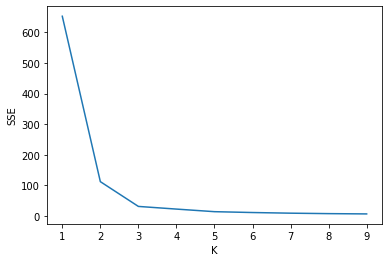

In [35]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,sse)

The elbow point is 3.